# Problem Definition

Kira Plastinina is a Russian brand that is sold through a defunct chain of retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines, and Armenia. The brand’s Sales and Marketing team would like to understand their customer’s behavior from data that they have collected over the past year. More specifically, they would like to learn the characteristics of customer groups.

# Experimental Design

* Check the Data
* Perform Data Cleaning
* Perform Exploratory Data Analysis  (Univariate, Bivariate & Multivariate)
* Implement the Solution
* Challenge the Solution
* Follow up Questions

# Checking the Data


In [3]:
install.packages('readr')

install.packages('dplyr')

install.packages("ggplot2")

install.packages('DataExplorer')

install.packages('tidyverse')

install.packages('DescTools')

install.packages('ggpurb')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘igraph’, ‘data.table’, ‘gridExtra’, ‘networkD3’

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘mvtnorm’, ‘expm’

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Warning message:
“package ‘ggpurb’ is not available (for R version 3.6.1)”

In [5]:
# Importing the necessary libraries

library(readr)

library(dplyr)

library(ggplot2)

library(DataExplorer)

library(tidyverse)

library(DescTools)

library(ggpubr)


── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.1.3     ✔ purrr   0.3.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ tibble  2.1.3     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


ERROR: ignored

In [6]:
#getting our dataset into the notebook

data = read.csv('/content/online_shoppers_intention.csv')

#previewing the first 5 rows

head(data)

Administrative Administrative_Duration Informational Informational_Duration
1 0               0                      0              0                    
2 0               0                      0              0                    
3 0              -1                      0             -1                    
4 0               0                      0              0                    
5 0               0                      0              0                    
6 0               0                      0              0                    
  ProductRelated ProductRelated_Duration BounceRates ExitRates PageValues
1  1               0.000000              0.20000000  0.2000000 0         
2  2              64.000000              0.00000000  0.1000000 0         
3  1              -1.000000              0.20000000  0.2000000 0         
4  2               2.666667              0.05000000  0.1400000 0         
5 10             627.500000              0.02000000  0.0500000 0         
6 19             154.216667              0.01578947  0.0245614 0         
  SpecialDay Month OperatingSystems Browser Region TrafficType
1 0          Feb   1                1       1      1          
2 0          Feb   2                2       1      2          
3 0          Feb   4                1       9      3          
4 0          Feb   3                2       2      4          
5 0          Feb   3                3       1      4          
6 0          Feb   2                2       1      3          
  VisitorType       Weekend Revenue
1 Returning_Visitor FALSE   FALSE  
2 Returning_Visitor FALSE   FALSE  
3 Returning_Visitor FALSE   FALSE  
4 Returning_Visitor FALSE   FALSE  
5 Returning_Visitor  TRUE   FALSE  
6 Returning_Visitor FALSE   FALSE

In [7]:
#previewing the last rows of our data

tail(data)

Administrative Administrative_Duration Informational
12325 0                0                     1            
12326 3              145                     0            
12327 0                0                     0            
12328 0                0                     0            
12329 4               75                     0            
12330 0                0                     0            
      Informational_Duration ProductRelated ProductRelated_Duration BounceRates
12325 0                      16              503.000                0.000000000
12326 0                      53             1783.792                0.007142857
12327 0                       5              465.750                0.000000000
12328 0                       6              184.250                0.083333333
12329 0                      15              346.000                0.000000000
12330 0                       3               21.250                0.000000000
      ExitRates  PageValues SpecialDay Month OperatingSystems Browser Region
12325 0.03764706  0.00000   0          Nov   2                2       1     
12326 0.02903061 12.24172   0          Dec   4                6       1     
12327 0.02133333  0.00000   0          Nov   3                2       1     
12328 0.08666667  0.00000   0          Nov   3                2       1     
12329 0.02105263  0.00000   0          Nov   2                2       3     
12330 0.06666667  0.00000   0          Nov   3                2       1     
      TrafficType VisitorType       Weekend Revenue
12325  1          Returning_Visitor FALSE   FALSE  
12326  1          Returning_Visitor  TRUE   FALSE  
12327  8          Returning_Visitor  TRUE   FALSE  
12328 13          Returning_Visitor  TRUE   FALSE  
12329 11          Returning_Visitor FALSE   FALSE  
12330  2          New_Visitor        TRUE   FALSE

In [8]:
#number of rows and columns in our dataset.

dim(data)

[1] 12330    18

In [9]:
#our datatype is a dataframe.

class(data)

[1] "data.frame"

In [0]:
#retrieving our unique features in our dataset.

attributes(data)

In [12]:
#getting our column names

names(data)

[1] "Administrative"          "Administrative_Duration"
 [3] "Informational"           "Informational_Duration" 
 [5] "ProductRelated"          "ProductRelated_Duration"
 [7] "BounceRates"             "ExitRates"              
 [9] "PageValues"              "SpecialDay"             
[11] "Month"                   "OperatingSystems"       
[13] "Browser"                 "Region"                 
[15] "TrafficType"             "VisitorType"            
[17] "Weekend"                 "Revenue"

In [13]:
#looking at the data types of each column

str(data)

'data.frame':	12330 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : Factor w/ 10 levels "Aug","Dec","Feb",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : Factor w/ 3 levels "Ne

In [14]:
#getting a statistical summary of the dataset

summary(data)

 Administrative   Administrative_Duration Informational   
 Min.   : 0.000   Min.   :  -1.00         Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.000  
 Median : 1.000   Median :   8.00         Median : 0.000  
 Mean   : 2.318   Mean   :  80.91         Mean   : 0.504  
 3rd Qu.: 4.000   3rd Qu.:  93.50         3rd Qu.: 0.000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.000  
 NA's   :14       NA's   :14              NA's   :14      
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  185.0        
 Median :   0.00        Median : 18.00   Median :  599.8        
 Mean   :  34.51        Mean   : 31.76   Mean   : 1196.0        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1466.5        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
 NA's   :14             NA's   :14       NA's   :14             
  Bounce

# Performing Data Cleaning


In [11]:
#Identifying missing data

colSums(is.na(data))

Administrative Administrative_Duration           Informational 
                     14                      14                      14 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                     14                      14                      14 
            BounceRates               ExitRates              PageValues 
                     14                      14                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

In [20]:
install.packages('zoo')

library(zoo)

ok = sapply(data, is.numeric)
data[ok] = lapply(data[ok], na.aggregate)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [21]:
#confirming if the missing data is still there

colSums(is.na(data))

Administrative Administrative_Duration           Informational 
                      0                       0                       0 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                      0                       0                       0 
            BounceRates               ExitRates              PageValues 
                      0                       0                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

Warning message in stack.data.frame(data):
“non-vector columns will be ignored”

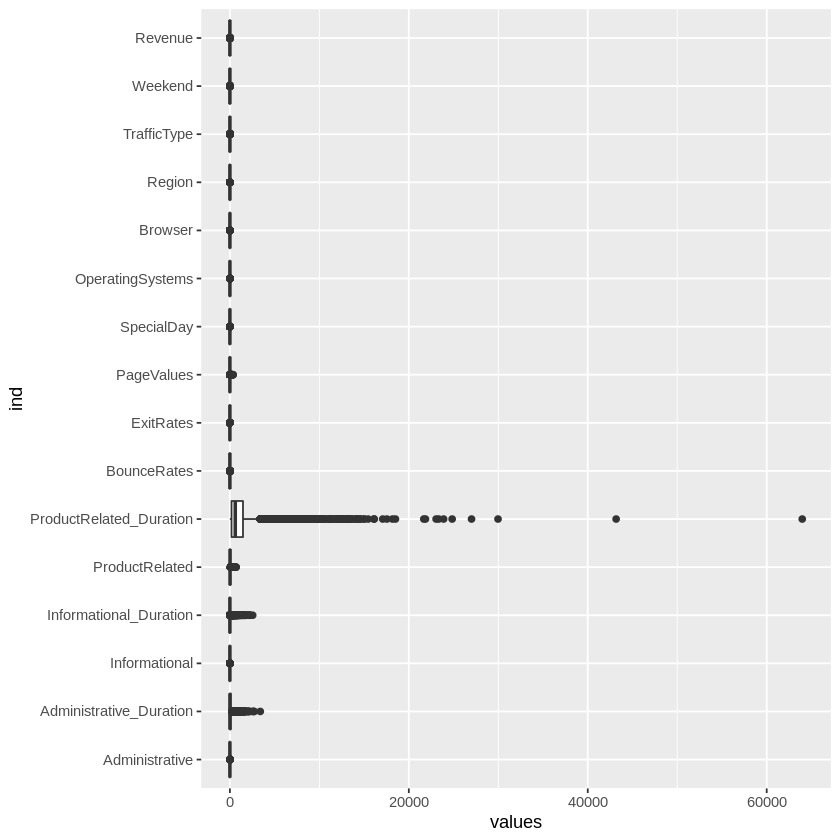

In [33]:
#Dealing with outliers
ggplot(stack(data), aes(x = ind, y = values)) +  geom_boxplot() + coord_flip()



In [35]:
#Checking for duplicated rows

duplicated_rows = data[duplicated(data),]
nrow(duplicated_rows)

#we will retain the duplicated rows since most of our columns have binary values,
#this increases the chances for duplication.

[1] 119

In [77]:
data = unique(data[, 1:18])
head(data)

Administrative Administrative_Duration Informational Informational_Duration
1 0               0                      0              0                    
2 0               0                      0              0                    
3 0              -1                      0             -1                    
4 0               0                      0              0                    
5 0               0                      0              0                    
6 0               0                      0              0                    
  ProductRelated ProductRelated_Duration BounceRates ExitRates PageValues
1  1               0.000000              0.20000000  0.2000000 0         
2  2              64.000000              0.00000000  0.1000000 0         
3  1              -1.000000              0.20000000  0.2000000 0         
4  2               2.666667              0.05000000  0.1400000 0         
5 10             627.500000              0.02000000  0.0500000 0         
6 19             154.216667              0.01578947  0.0245614 0         
  SpecialDay Month OperatingSystems Browser Region TrafficType
1 0          Feb   1                1       1      1          
2 0          Feb   2                2       1      2          
3 0          Feb   4                1       9      3          
4 0          Feb   3                2       2      4          
5 0          Feb   3                3       1      4          
6 0          Feb   2                2       1      3          
  VisitorType       Weekend Revenue
1 Returning_Visitor FALSE   FALSE  
2 Returning_Visitor FALSE   FALSE  
3 Returning_Visitor FALSE   FALSE  
4 Returning_Visitor FALSE   FALSE  
5 Returning_Visitor  TRUE   FALSE  
6 Returning_Visitor FALSE   FALSE

In [78]:
duplicated_rows = data[duplicated(data),]
nrow(duplicated_rows)


[1] 0

# Exploratory Data Analysis  (Univariate, Bivariate & Multivariate)


In [40]:
create_report(data, report_title = "Data Profiling Report")



processing file: report.rmd


  |..                                                               |   2%
   inline R code fragments

  |...                                                              |   5%
label: global_options (with options) 
List of 1
 $ include: logi FALSE

  |.....                                                            |   7%
  ordinary text without R code

  |......                                                           |  10%
label: introduce
  |........                                                         |  12%
  ordinary text without R code

  |.........                                                        |  14%
label: plot_intro
  |...........                                                      |  17%
  ordinary text without R code

  |............                                                     |  19%
label: data_structure
  |..............                                                   |  21%
  ordinary text without R code

  |...............                      

output file: /content/report.knit.md



/usr/bin/pandoc +RTS -K512m -RTS /content/report.utf8.md --to html4 --from markdown+autolink_bare_uris+tex_math_single_backslash --output /content/report.html --smart --email-obfuscation none --self-contained --standalone --section-divs --table-of-contents --toc-depth 6 --template /usr/lib/R/site-library/rmarkdown/rmd/h/default.html --no-highlight --variable highlightjs=1 --variable 'theme:yeti' --include-in-header /tmp/RtmppD44dE/rmarkdown-str84130f839a.html --mathjax --variable 'mathjax-url:https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' 



Output created: report.html


Report is generated at "/content/report.html".


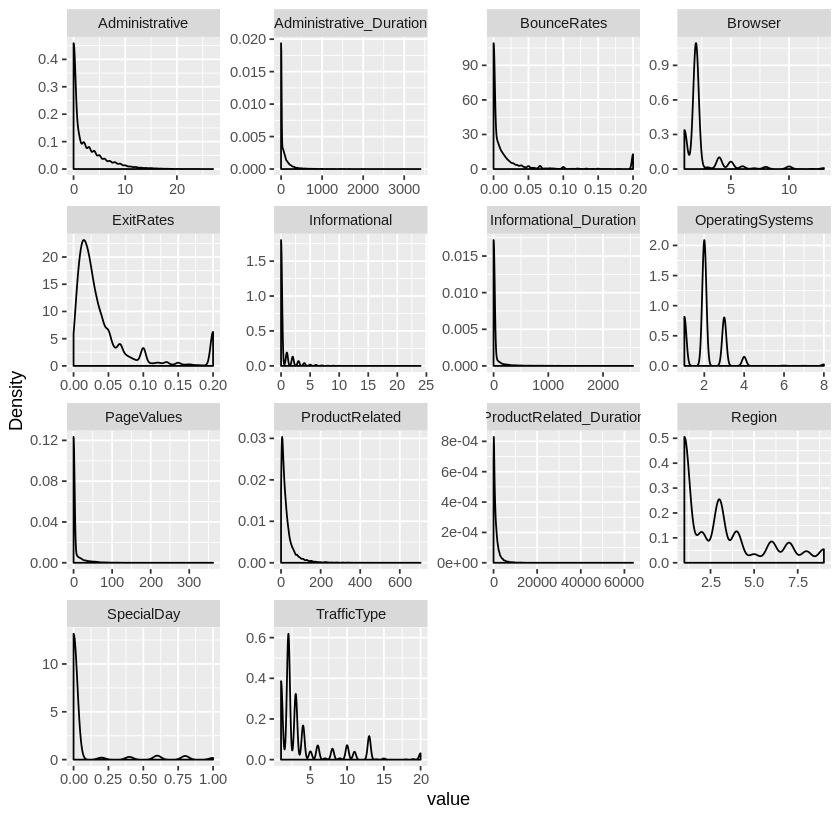

In [41]:
# Checking the distribution of the variables in our dataset
plot_density(data)

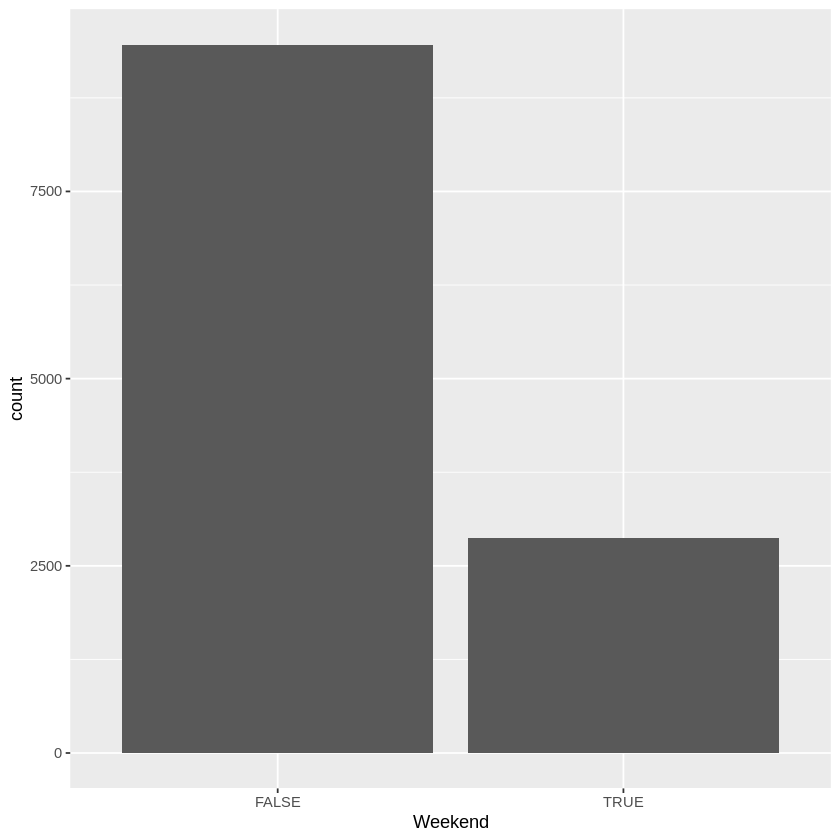

In [43]:
ggplot(data = data) +
  geom_bar(mapping = aes(x = Weekend))

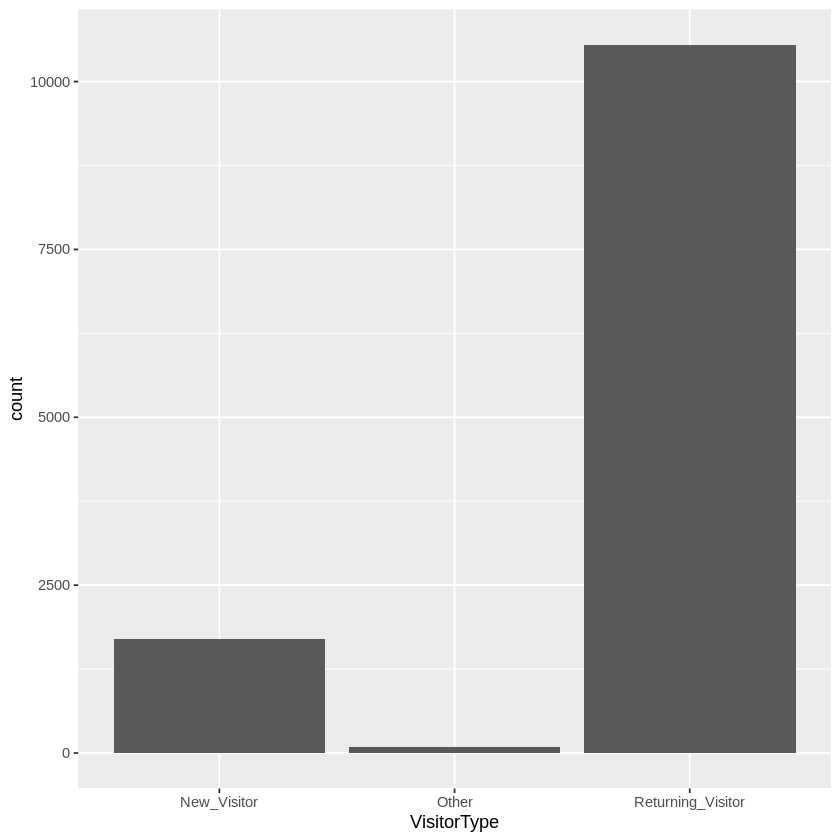

In [45]:
ggplot(data = data) +
  geom_bar(mapping = aes(x = VisitorType))

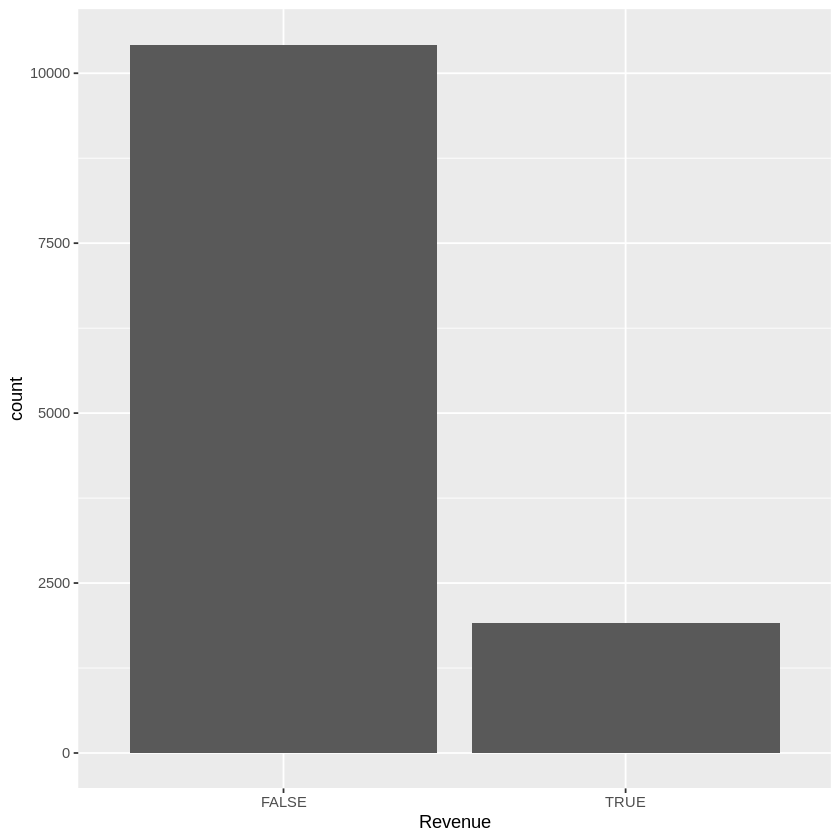

In [46]:
ggplot(data = data) +
  geom_bar(mapping = aes(x = Revenue))

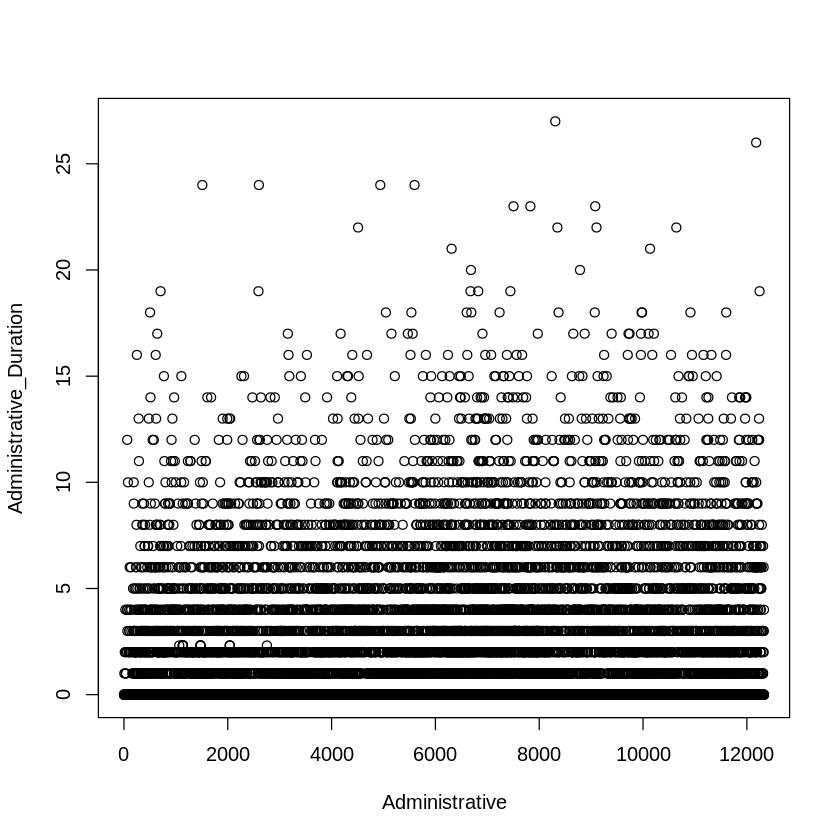

In [48]:

x = data$Administrative

y = data$Daily.Administrative_Duration

plot(x,y, xlab='Administrative',ylab='Administrative_Duration')

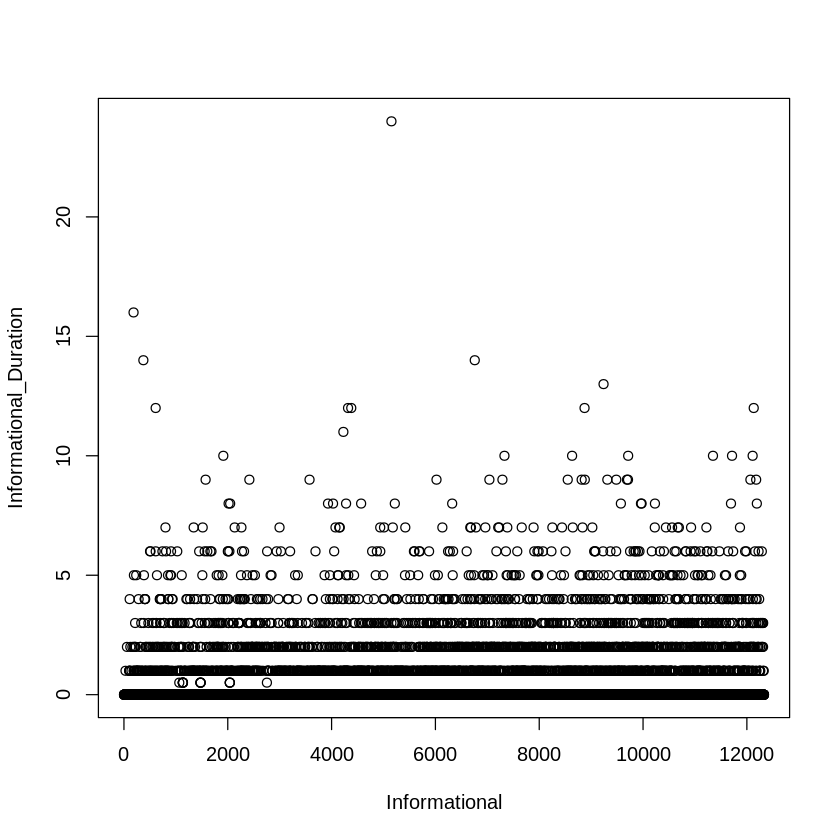

In [49]:
x = data$Informational

y = data$Daily.Informational_Duration

plot(x,y, xlab='Informational',ylab='Informational_Duration')

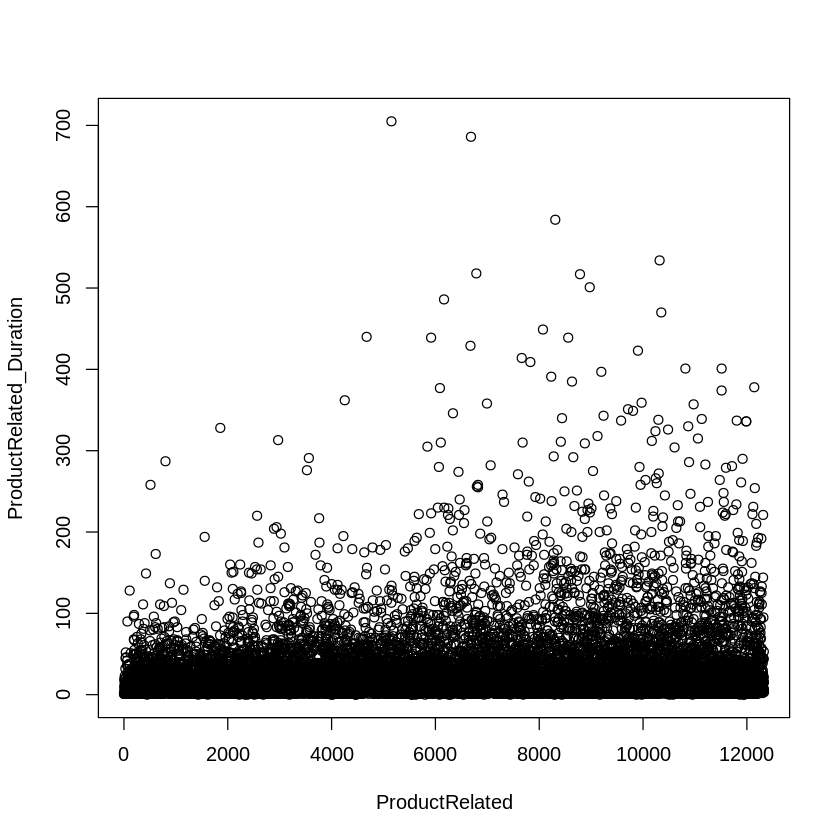

In [50]:
x = data$ProductRelated

y = data$Daily.ProductRelated_Duration

plot(x,y, xlab='ProductRelated',ylab='ProductRelated_Duration')

In [51]:
head(data)

Administrative Administrative_Duration Informational Informational_Duration
1 0               0                      0              0                    
2 0               0                      0              0                    
3 0              -1                      0             -1                    
4 0               0                      0              0                    
5 0               0                      0              0                    
6 0               0                      0              0                    
  ProductRelated ProductRelated_Duration BounceRates ExitRates PageValues
1  1               0.000000              0.20000000  0.2000000 0         
2  2              64.000000              0.00000000  0.1000000 0         
3  1              -1.000000              0.20000000  0.2000000 0         
4  2               2.666667              0.05000000  0.1400000 0         
5 10             627.500000              0.02000000  0.0500000 0         
6 19             154.216667              0.01578947  0.0245614 0         
  SpecialDay Month OperatingSystems Browser Region TrafficType
1 0          Feb   1                1       1      1          
2 0          Feb   2                2       1      2          
3 0          Feb   4                1       9      3          
4 0          Feb   3                2       2      4          
5 0          Feb   3                3       1      4          
6 0          Feb   2                2       1      3          
  VisitorType       Weekend Revenue
1 Returning_Visitor FALSE   FALSE  
2 Returning_Visitor FALSE   FALSE  
3 Returning_Visitor FALSE   FALSE  
4 Returning_Visitor FALSE   FALSE  
5 Returning_Visitor  TRUE   FALSE  
6 Returning_Visitor FALSE   FALSE

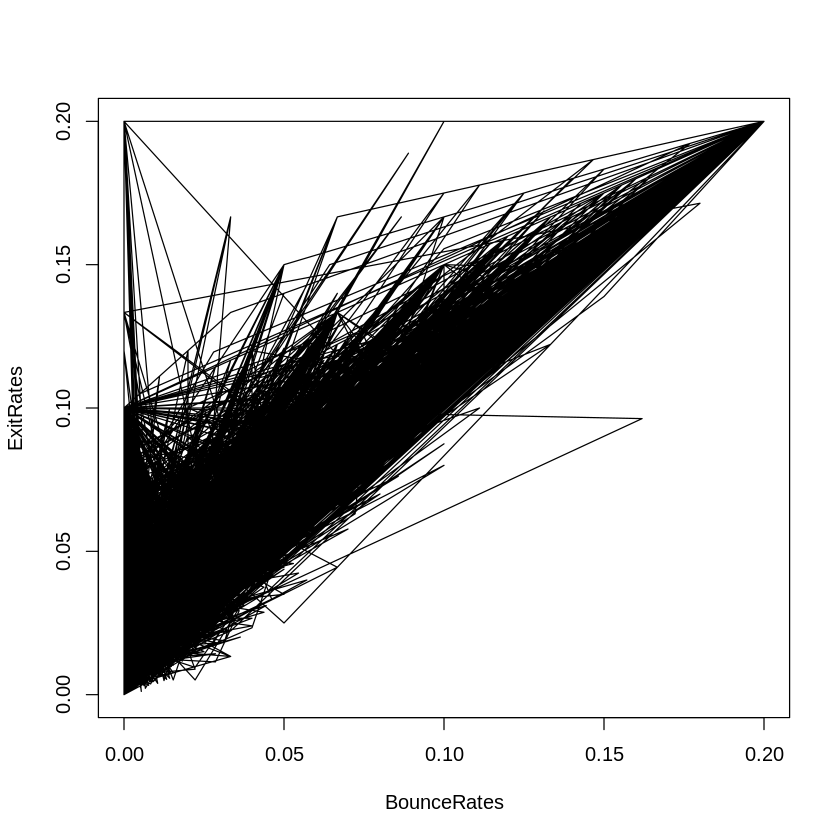

In [53]:


x = data$BounceRates

y = data$ExitRates

plot(x,y,type = 'l', xlab='BounceRates',ylab='ExitRates')

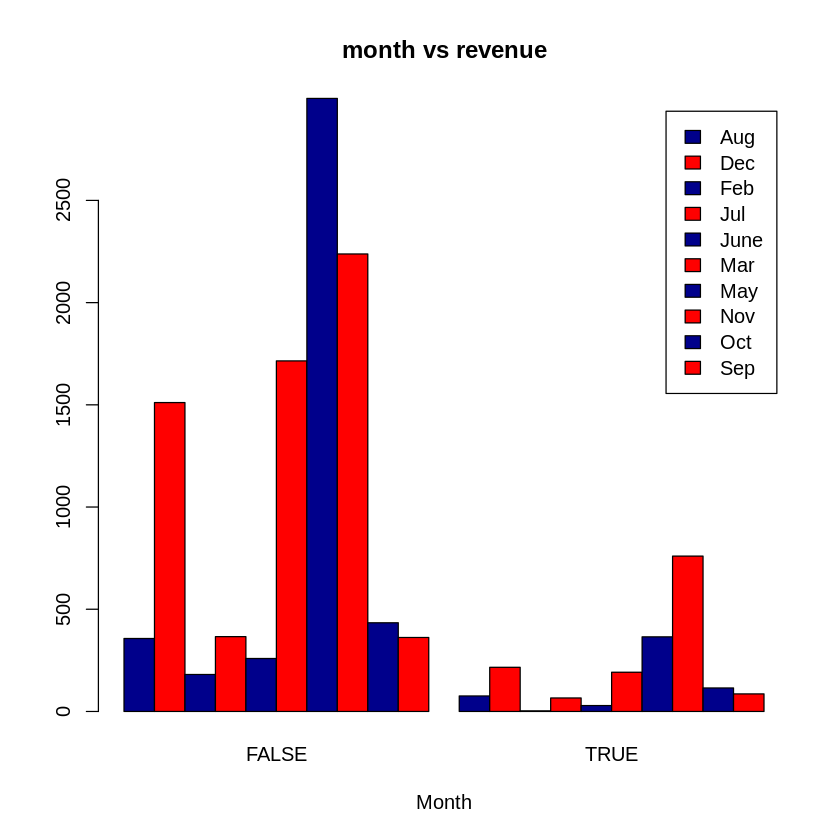

In [57]:
x = data$Month

y = data$Revenue

counts <- table(x, y)
barplot(counts, main="month vs revenue",
  xlab="Month", col=c("darkblue","red"),
  legend = rownames(counts), beside=TRUE)

In [58]:
my_num_data = data[, sapply(data, is.numeric)]

cor(my_num_data, use = "complete.obs", method = "pearson")

Administrative Administrative_Duration Informational
Administrative           1.000000000    0.601466169             0.376781907 
Administrative_Duration  0.601466169    1.000000000             0.302646624 
Informational            0.376781907    0.302646624             1.000000000 
Informational_Duration   0.255756989    0.237958597             0.618965149 
ProductRelated           0.430832402    0.288869393             0.374097712 
ProductRelated_Duration  0.373646961    0.355238452             0.387446219 
BounceRates             -0.223473560   -0.144128305            -0.116070836 
ExitRates               -0.316192240   -0.205618430            -0.163538534 
PageValues               0.098765561    0.067458660             0.048536054 
SpecialDay              -0.095048523   -0.073468339            -0.048325680 
OperatingSystems        -0.006456660   -0.007422704            -0.009431769 
Browser                 -0.025239257   -0.015522909            -0.038251507 
Region                  -0.005678385   -0.005679731            -0.029432489 
TrafficType             -0.033724325   -0.014476960            -0.034485903 
                        Informational_Duration ProductRelated
Administrative           0.25575699             0.430832402  
Administrative_Duration  0.23795860             0.288869393  
Informational            0.61896515             0.374097712  
Informational_Duration   1.00000000             0.279965656  
ProductRelated           0.27996566             1.000000000  
ProductRelated_Duration  0.34730003             0.860868160  
BounceRates             -0.07407670            -0.204469070  
ExitRates               -0.10520464            -0.292219420  
PageValues               0.03078511             0.056063756  
SpecialDay              -0.03065659            -0.024188945  
OperatingSystems        -0.00959346             0.004191418  
Browser                 -0.01934327            -0.013324595  
Region                  -0.02723550            -0.038306608  
TrafficType             -0.02471355            -0.043204220  
                        ProductRelated_Duration BounceRates  ExitRates   
Administrative           0.373646961            -0.223473560 -0.316192240
Administrative_Duration  0.355238452            -0.144128305 -0.205618430
Informational            0.387446219            -0.116070836 -0.163538534
Informational_Duration   0.347300028            -0.074076704 -0.105204635
ProductRelated           0.860868160            -0.204469070 -0.292219420
ProductRelated_Duration  1.000000000            -0.184408837 -0.251644747
BounceRates             -0.184408837             1.000000000  0.913436421
ExitRates               -0.251644747             0.913436421  1.000000000
PageValues               0.052619666            -0.119349756 -0.174387092
SpecialDay              -0.036595849             0.073083822  0.102893260
OperatingSystems         0.002884552             0.023957878  0.014740953
Browser                 -0.007547802            -0.016006820 -0.004406084
Region                  -0.033253093            -0.006729041 -0.008833343
TrafficType             -0.036511691             0.078837795  0.078941617
                        PageValues  SpecialDay   OperatingSystems Browser     
Administrative           0.09876556 -0.095048523 -0.006456660     -0.025239257
Administrative_Duration  0.06745866 -0.073468339 -0.007422704     -0.015522909
Informational            0.04853605 -0.048325680 -0.009431769     -0.038251507
Informational_Duration   0.03078511 -0.030656591 -0.009593460     -0.019343275
ProductRelated           0.05606376 -0.024188945  0.004191418     -0.013324595
ProductRelated_Duration  0.05261967 -0.036595849  0.002884552     -0.007547802
BounceRates             -0.11934976  0.073083822  0.023957878     -0.016006820
ExitRates               -0.17438709  0.102893260  0.014740953     -0.004406084
PageValues               1.00000000 -0.063541272  0.018507947      0.045591919
SpecialDay              -0.06354127  1.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
corrplot 0.84 loaded


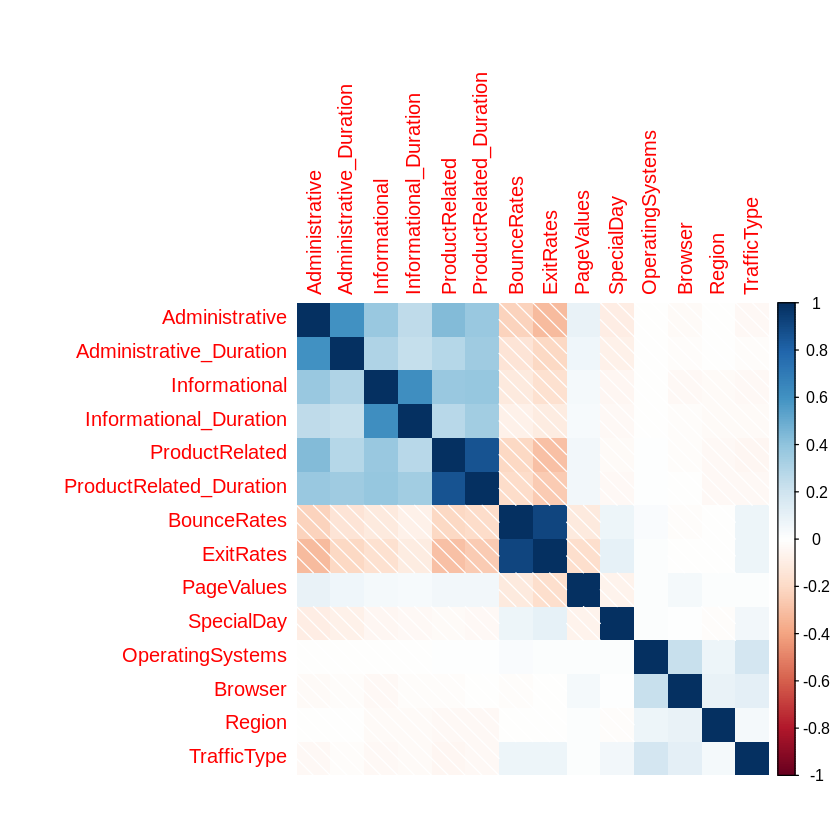

In [59]:
#installing the necessary packages and the libraries.

install.packages("corrplot")
library(corrplot)

#`getting the numeric values of our dataaset
my_num_data = data[, sapply(data, is.numeric)]

#plotting the numeric values.
corrplot(cor(my_num_data), method = 'shade')

# Implement the Solution


In [60]:
head(data)

Administrative Administrative_Duration Informational Informational_Duration
1 0               0                      0              0                    
2 0               0                      0              0                    
3 0              -1                      0             -1                    
4 0               0                      0              0                    
5 0               0                      0              0                    
6 0               0                      0              0                    
  ProductRelated ProductRelated_Duration BounceRates ExitRates PageValues
1  1               0.000000              0.20000000  0.2000000 0         
2  2              64.000000              0.00000000  0.1000000 0         
3  1              -1.000000              0.20000000  0.2000000 0         
4  2               2.666667              0.05000000  0.1400000 0         
5 10             627.500000              0.02000000  0.0500000 0         
6 19             154.216667              0.01578947  0.0245614 0         
  SpecialDay Month OperatingSystems Browser Region TrafficType
1 0          Feb   1                1       1      1          
2 0          Feb   2                2       1      2          
3 0          Feb   4                1       9      3          
4 0          Feb   3                2       2      4          
5 0          Feb   3                3       1      4          
6 0          Feb   2                2       1      3          
  VisitorType       Weekend Revenue
1 Returning_Visitor FALSE   FALSE  
2 Returning_Visitor FALSE   FALSE  
3 Returning_Visitor FALSE   FALSE  
4 Returning_Visitor FALSE   FALSE  
5 Returning_Visitor  TRUE   FALSE  
6 Returning_Visitor FALSE   FALSE

In [63]:
#installing the necessary packages
install.packages('caret')
library(caret)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘prodlim’, ‘ipred’, ‘recipes’

Loading required package: lattice

Attaching package: ‘caret’

The following objects are masked from ‘package:DescTools’:

    MAE, RMSE

The following object is masked from ‘package:purrr’:

    lift



In [79]:
#We will use our revenue column as our label hence exclude it from clustering.

# Selecting the features
df = data[,1:17]

# Getting dummies
dumm = dummyVars("~ .", data = df)
newdf = data.frame(predict(dumm, newdata = df))

head(newdf)

Administrative Administrative_Duration Informational Informational_Duration
1 0               0                      0              0                    
2 0               0                      0              0                    
3 0              -1                      0             -1                    
4 0               0                      0              0                    
5 0               0                      0              0                    
6 0               0                      0              0                    
  ProductRelated ProductRelated_Duration BounceRates ExitRates PageValues
1  1               0.000000              0.20000000  0.2000000 0         
2  2              64.000000              0.00000000  0.1000000 0         
3  1              -1.000000              0.20000000  0.2000000 0         
4  2               2.666667              0.05000000  0.1400000 0         
5 10             627.500000              0.02000000  0.0500000 0         
6 19             154.216667              0.01578947  0.0245614 0         
  SpecialDay ⋯ Month.Sep OperatingSystems Browser Region TrafficType
1 0          ⋯ 0         1                1       1      1          
2 0          ⋯ 0         2                2       1      2          
3 0          ⋯ 0         4                1       9      3          
4 0          ⋯ 0         3                2       2      4          
5 0          ⋯ 0         3                3       1      4          
6 0          ⋯ 0         2                2       1      3          
  VisitorType.New_Visitor VisitorType.Other VisitorType.Returning_Visitor
1 0                       0                 1                            
2 0                       0                 1                            
3 0                       0                 1                            
4 0                       0                 1                            
5 0                       0                 1                            
6 0                       0                 1                            
  WeekendFALSE WeekendTRUE
1 1            0          
2 1            0          
3 1            0          
4 1            0          
5 0            1          
6 1            0

# PCA

In [80]:
#Using the prcomp() function for PCA.

df.pca = prcomp(newdf, scale = TRUE)

df.pca

cat('\n')

('-------------------------------------------------------------------')

summary(df.pca)

cat('\n')



Standard deviations (1, .., p=29):
 [1] 1.862156e+00 1.550364e+00 1.414579e+00 1.327357e+00 1.282762e+00
 [6] 1.204676e+00 1.150057e+00 1.064529e+00 1.060115e+00 1.031762e+00
[11] 1.021290e+00 1.018627e+00 1.014861e+00 1.007245e+00 9.807322e-01
[16] 9.741865e-01 9.664836e-01 9.478900e-01 9.059447e-01 8.714716e-01
[21] 7.997548e-01 7.483481e-01 6.476970e-01 5.917875e-01 3.504772e-01
[26] 2.896791e-01 8.269634e-16 3.712381e-16 1.811716e-16

Rotation (n x k) = (29 x 29):
                                       PC1          PC2          PC3
Administrative                 0.373064397 -0.009587252  0.044904656
Administrative_Duration        0.318520572 -0.023981066  0.045512467
Informational                  0.336907007 -0.130963622 -0.008567268
Informational_Duration         0.285560929 -0.128077092 -0.006134050
ProductRelated                 0.403817398 -0.172131686  0.018653627
ProductRelated_Duration        0.403748763 -0.180080365  0.025607667
BounceRates                   -0.269423338 -

[1] "-------------------------------------------------------------------"

Importance of components:
                          PC1     PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     1.8622 1.55036 1.4146 1.32736 1.28276 1.20468 1.15006
Proportion of Variance 0.1196 0.08288 0.0690 0.06075 0.05674 0.05004 0.04561
Cumulative Proportion  0.1196 0.20246 0.2715 0.33221 0.38895 0.43900 0.48460
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     1.06453 1.06011 1.03176 1.02129 1.01863 1.01486 1.00725
Proportion of Variance 0.03908 0.03875 0.03671 0.03597 0.03578 0.03552 0.03498
Cumulative Proportion  0.52368 0.56243 0.59914 0.63511 0.67089 0.70640 0.74139
                          PC15    PC16    PC17    PC18   PC19    PC20    PC21
Standard deviation     0.98073 0.97419 0.96648 0.94789 0.9059 0.87147 0.79975
Proportion of Variance 0.03317 0.03273 0.03221 0.03098 0.0283 0.02619 0.02206
Cumulative Proportion  0.77455 0.80728 0.83949 0.87047 0.8988 0.92496 0.94702
                          PC22    PC23

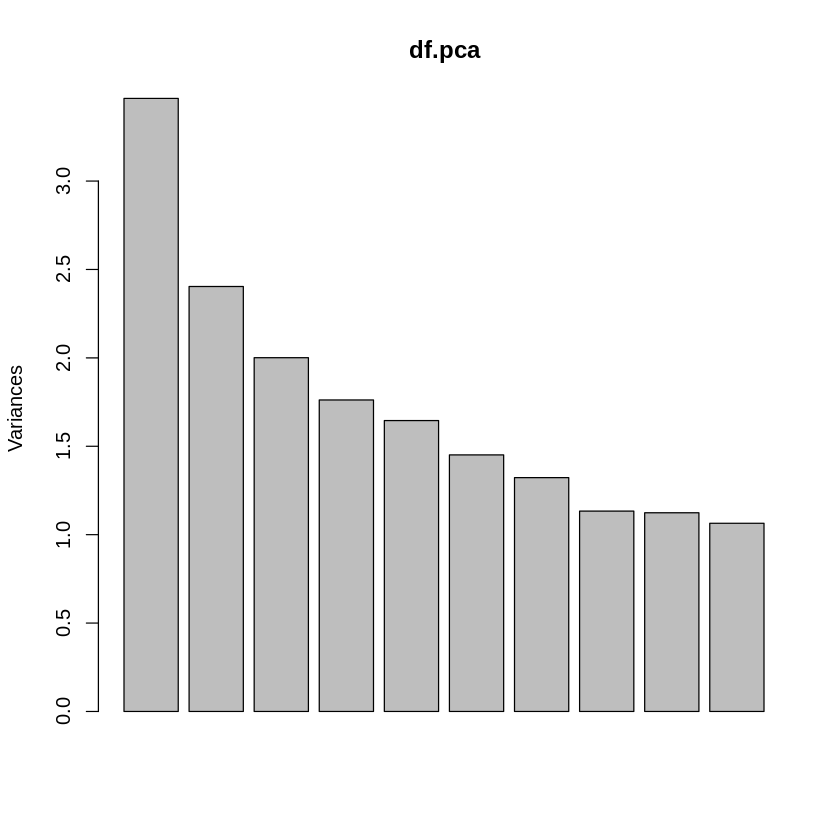

In [81]:
plot(df.pca)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Warning message:
“package ‘ggbiplot’ is not available (for R version 3.6.1)”Skipping install of 'ggbiplot' from a github remote, the SHA1 (7325e880) has not changed since last install.
  Use `force = TRUE` to force installation
Loading required package: plyr
------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following object is masked from ‘package:purrr’:

    compact

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

Loading required package: scales

Attaching package: ‘scales’

The following object i

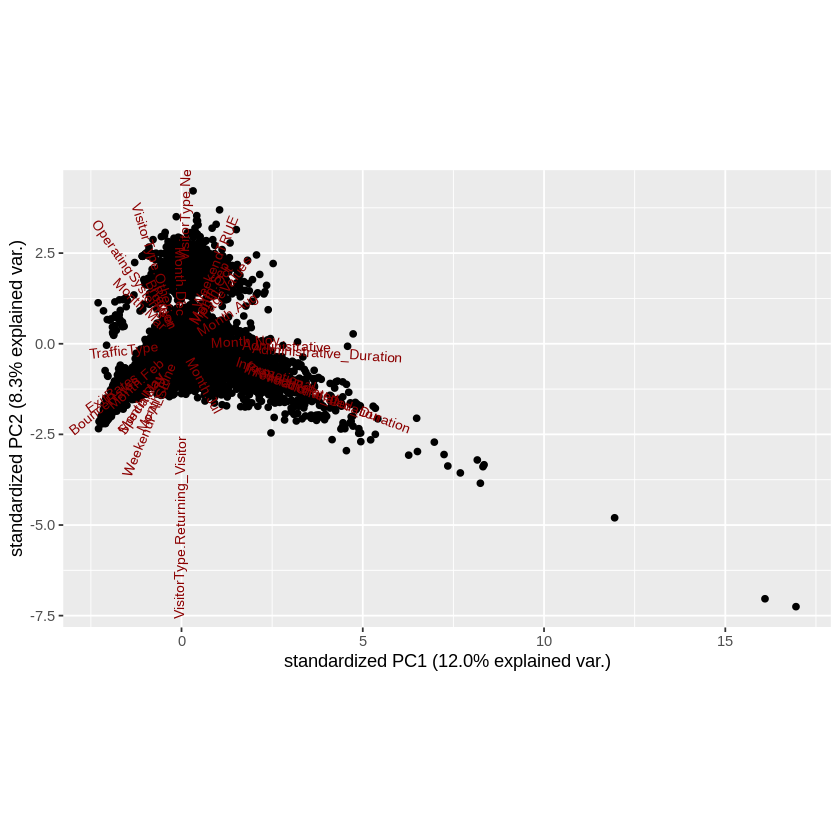

In [98]:
install.packages('ggbiplot')

library(devtools)

install_github("vqv/ggbiplot")

library(ggbiplot)

ggbiplot(df.pca)

# t-SNE

In [73]:
#Installing package Rtnse package.

install.packages('Rtsne')

#loading the rtnse library.

library(Rtsne)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [83]:
rtnse = Rtsne(newdf)
summary(rtnse)

                    Length Class  Mode   
N                       1  -none- numeric
Y                   24422  -none- numeric
costs               12211  -none- numeric
itercosts              20  -none- numeric
origD                   1  -none- numeric
perplexity              1  -none- numeric
theta                   1  -none- numeric
max_iter                1  -none- numeric
stop_lying_iter         1  -none- numeric
mom_switch_iter         1  -none- numeric
momentum                1  -none- numeric
final_momentum          1  -none- numeric
eta                     1  -none- numeric
exaggeration_factor     1  -none- numeric

In [86]:
rtnse

$N
[1] 12211

$Y
                  [,1]          [,2]
    [1,] -52.990628263   2.859478142
    [2,] -18.129842472  17.002671597
    [3,] -59.207330331  -8.709648536
    [4,] -44.030746192  -1.565021186
    [5,] -26.886371651  -2.232216174
    [6,]  42.648852834  12.273342962
    [7,] -60.145324522   4.680718502
    [8,] -48.734156786  -5.078155421
    [9,] -36.051963498  18.242096014
   [10,] -32.430274708  30.060325823
   [11,]   9.865080252 -49.448745681
   [12,]   8.085794026 -47.938509405
   [13,]  39.260005134 -31.678809162
   [14,]  -0.082389643  22.203794779
   [15,] -15.506743452  16.832207889
   [16,]  24.494060059  12.297341692
   [17,] -53.868467840  -4.031803058
   [18,]  24.831948567 -42.735229669
   [19,] -37.946915523  16.736385023
   [20,] -23.542160504 -15.525625495
   [21,]  41.696821667  19.741861572
   [22,] -47.942139530  -1.844673560
   [23,]   2.039807347  25.007556359
   [24,] -39.935399656   3.777012161
   [25,] -57.453476849  -2.280848324
   [26,]  46.903990206  13.304951300
   [27,]   4.718442671  44.151541529
   [28,] -12.343188199  18.741681518
   [29,] -18.769640992  17.200280586
   [30,]  27.666505582  16.750709077
   [31,] -35.601988414  17.117135022
   [32,] -11.557509109  20.335472071
   [33,]  49.029700531  -7.256095239
   [34,]  47.509777022   2.914680393
   [35,]  13.714749472 -47.811520922
   [36,]   8.241786567  -4.732729764
   [37,]  12.596412188 -49.398932004
   [38,]  29.755472193 -30.547027261
   [39,] -18.415159060  16.135514793
   [40,]  -4.919306902 -37.387912918
   [41,] -15.257395361 -38.122548418
   [42,] -40.388997630   9.836469816
   [43,]  30.358953325 -38.248159627
   [44,] -37.307211578  17.494570374
   [45,]  -5.224433531  21.224980999
   [46,] -26.924633330  -3.213848585
   [47,]  48.030718445 -11.482861557
   [48,]  -9.183742179  20.938158561
   [49,] -30.324159872  38.049791308
   [50,] -53.797783366  -4.336555903
   [51,] -53.760745389  -3.865263704
   [52,]  42.869390628 -26.991604153
   [53,] -38.413123717  15.077017119
   [54,]  47.084357603  11.583926328
   [55,]  41.176347728  20.844696662
   [56,] -60.440469842   6.823076658
   [57,] -51.516756756  -3.611930436
   [58,]  -3.831245530  37.188282390
   [59,]   2.202741345  25.836864501
   [60,]  12.663965500 -36.796368943
   [61,]  47.603203136   8.252890352
   [62,]   9.228170658 -49.121614858
   [63,]  16.152728964  21.014546283
   [64,] -31.550589949   9.332280137
   [65,] -53.717808819  -4.287948606
   [66,] -15.897927861  33.702645234
   [67,] -30.675972013 -47.825018043
   [68,] -58.152840839  -3.028104326
   [69,] -19.587589445  48.557005287
   [70,] -51.523658109  -3.609227132
   [71,] -59.946373003   7.918754479
   [72,]  45.748979226  -1.646190090
   [73,] -31.737283544  19.886812141
   [74,]   3.584263934 -47.042586108
   [75,]  41.336947896  21.040132706
   [76,] -25.301017777  -8.300396203
   [77,]   9.325880645  12.975421302
   [78,] -12.431324204  19.346678737
   [79,] -51.152951132   2.043733753
   [80,] -51.525999068   0.639587617
   [81,]  49.360624604  -5.992326498
   [82,]  41.686052925 -30.178811622
   [83,] -34.256531449  20.022079677
   [84,]  15.039449393 -47.515004713
   [85,] -57.213054832   2.817611153
   [86,] -51.503863895   0.640189780
   [87,]  43.752938756  15.010141576
   [88,]  41.201743401  20.333887398
   [89,]  25.202659646 -43.934587042
   [90,] -26.709146952  -3.357765534
   [91,]  35.382294273  -8.618524335
   [92,] -51.411378376   2.389196863
   [93,] -24.783447161  18.664646350
   [94,] -27.933263428   0.890380892
   [95,] -16.087044491  48.836789830
   [96,] -37.672358901  17.152137570
   [97,]  29.178163069  18.523756710
   [98,]   2.218376045  24.811131252
   [99,] -26.607412766  18.137607928
  [100,] -28.114754981   0.349672999
  [101,] -14.171947842  -8.966876333
  [102,] -18.447745603  -1.845310938
  [103,]   6.479017802 -48.360970144
  [104,]   8.364363486  -3.465443776
  [105,]  27.544455108 -26.371301892
  [106,] -37.727566243  13.629564511
  [107,]  49.087572233  

In [88]:
class(rtnse)

cat('\n')

str(rtnse)

[1] "list"


List of 14
 $ N                  : int 12211
 $ Y                  : num [1:12211, 1:2] -53 -18.1 -59.2 -44 -26.9 ...
 $ costs              : num [1:12211] 5.11e-05 7.85e-05 2.54e-05 1.26e-04 6.71e-05 ...
 $ itercosts          : num [1:20] 100.5 84.3 76.9 74.3 72.8 ...
 $ origD              : int 29
 $ perplexity         : num 30
 $ theta              : num 0.5
 $ max_iter           : num 1000
 $ stop_lying_iter    : int 250
 $ mom_switch_iter    : int 250
 $ momentum           : num 0.5
 $ final_momentum     : num 0.8
 $ eta                : num 200
 $ exaggeration_factor: num 12


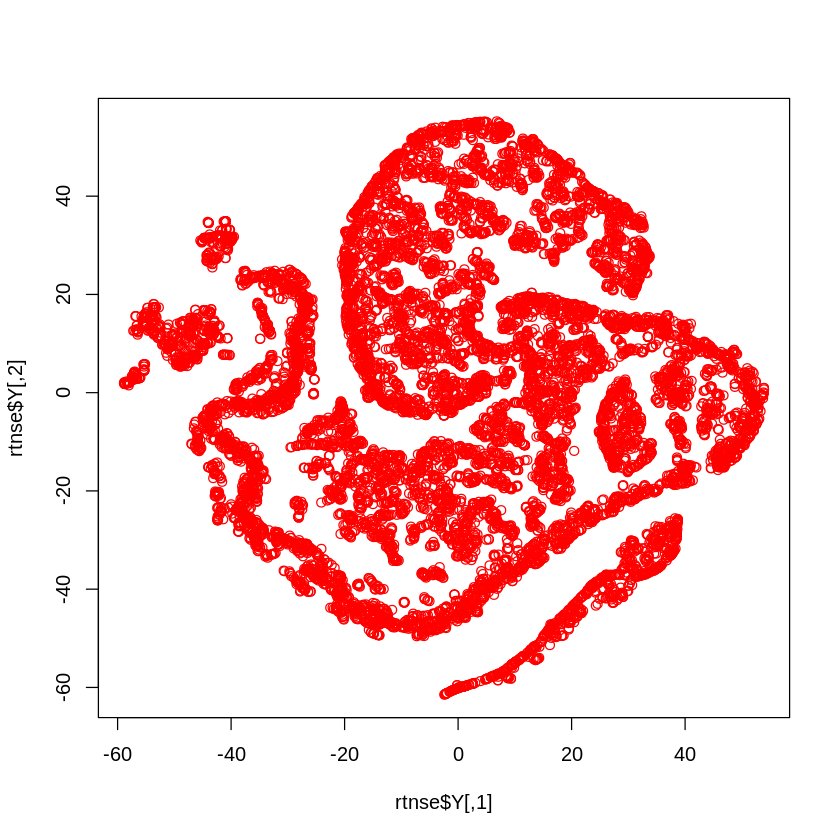

In [93]:
data_unique = unique(data)

plot(rtnse$Y,col="red")

# K-means

In [72]:
install.packages('factoextra')
library(factoextra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘viridis’, ‘car’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘ggrepel’

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


List of 9
 $ cluster     : Named int [1:12211] 2 2 2 2 2 2 2 2 2 2 ...
  ..- attr(*, "names")= chr [1:12211] "1" "2" "3" "4" ...
 $ centers     : num [1:2, 1:29] 5.63 2.07 207.87 71.27 1.76 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:2] "1" "2"
  .. ..$ : chr [1:29] "Administrative" "Administrative_Duration" "Informational" "Informational_Duration" ...
 $ totss       : num 4.56e+10
 $ withinss    : num [1:2] 1.37e+10 7.73e+09
 $ tot.withinss: num 2.15e+10
 $ betweenss   : num 2.42e+10
 $ size        : int [1:2] 931 11280
 $ iter        : int 1
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


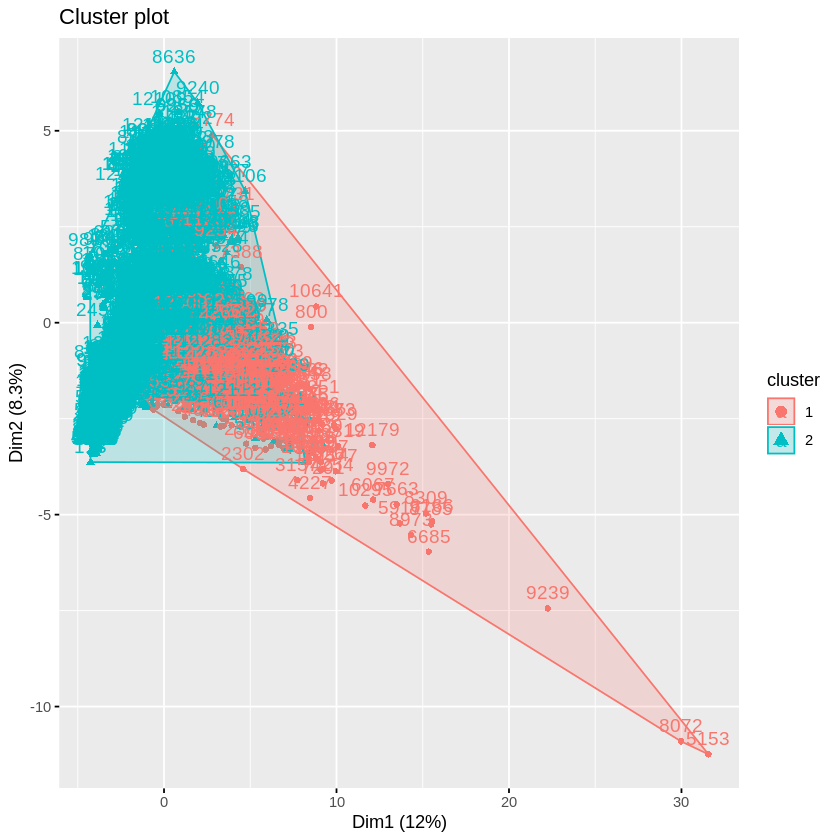

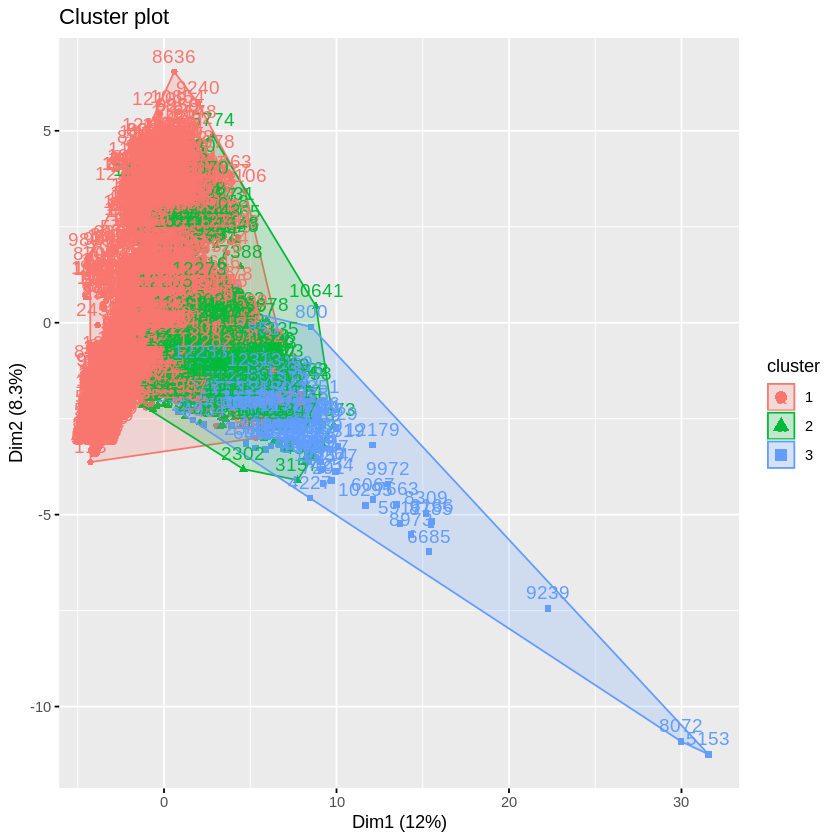

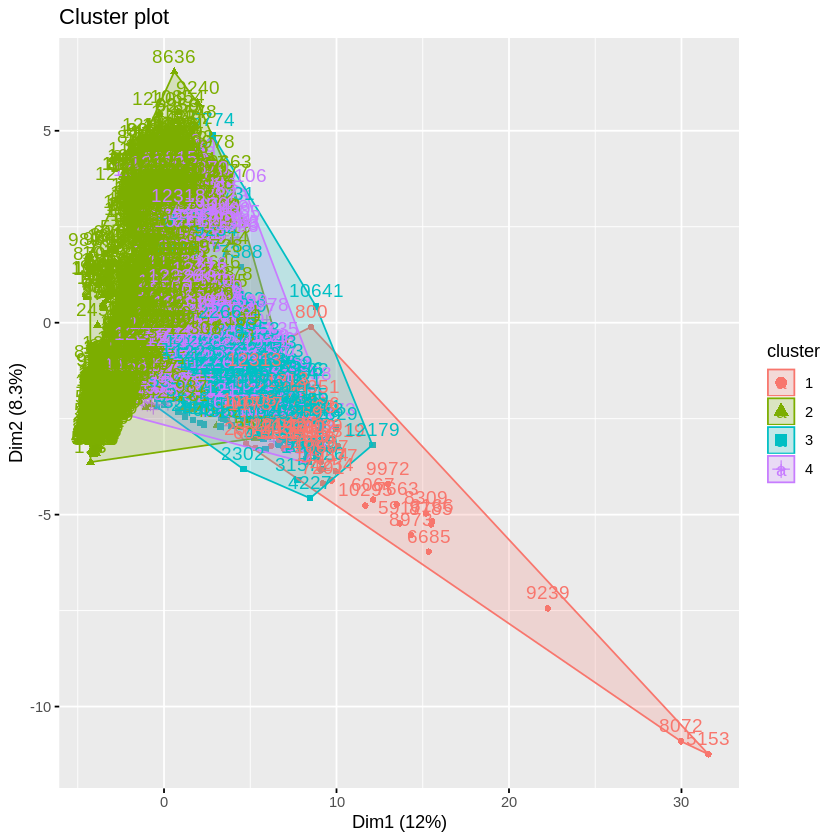

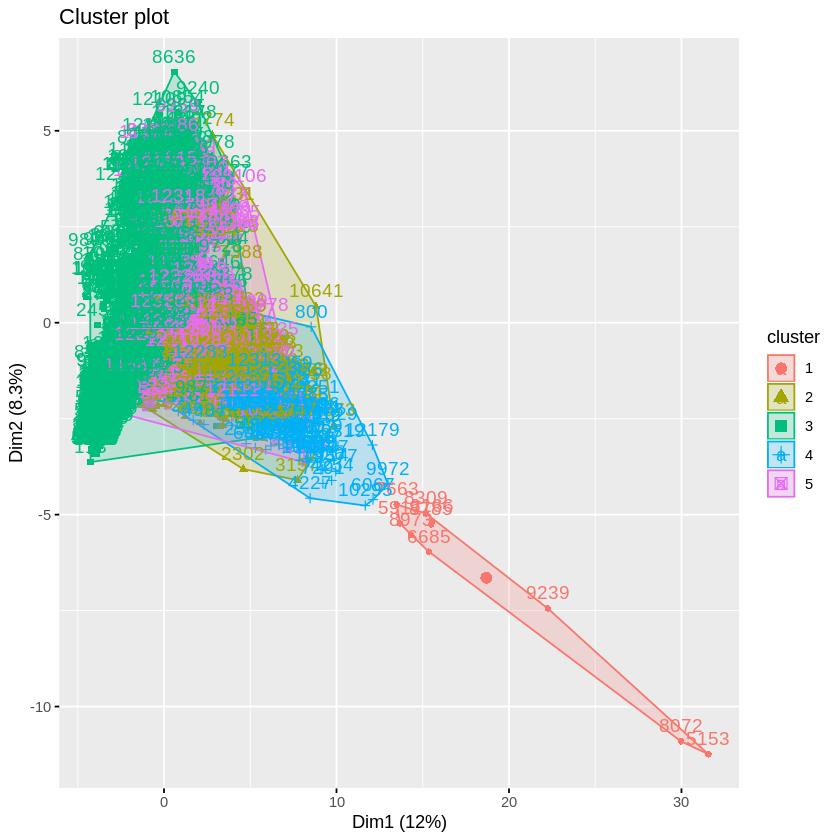

In [100]:
#should be numerical data
#data = data
#centers = number of clusters/k
#iter.max = max number of iteration allowed.Default is 10.
#nstart = number of starting partitions


k2 = kmeans(newdf, centers = 2,iter.max = 10, nstart = 25)
str(k2)
#Repeating the same with k3,k4,k4 and k5

k3 = kmeans(newdf, centers = 3, nstart = 25)
k4 = kmeans(newdf, centers = 4, nstart = 25)
k5 = kmeans(newdf, centers = 5, nstart = 25)

fviz_cluster(k2, data = newdf)
fviz_cluster(k3, data = newdf)
fviz_cluster(k4, data = newdf)
fviz_cluster(k5, data = newdf)

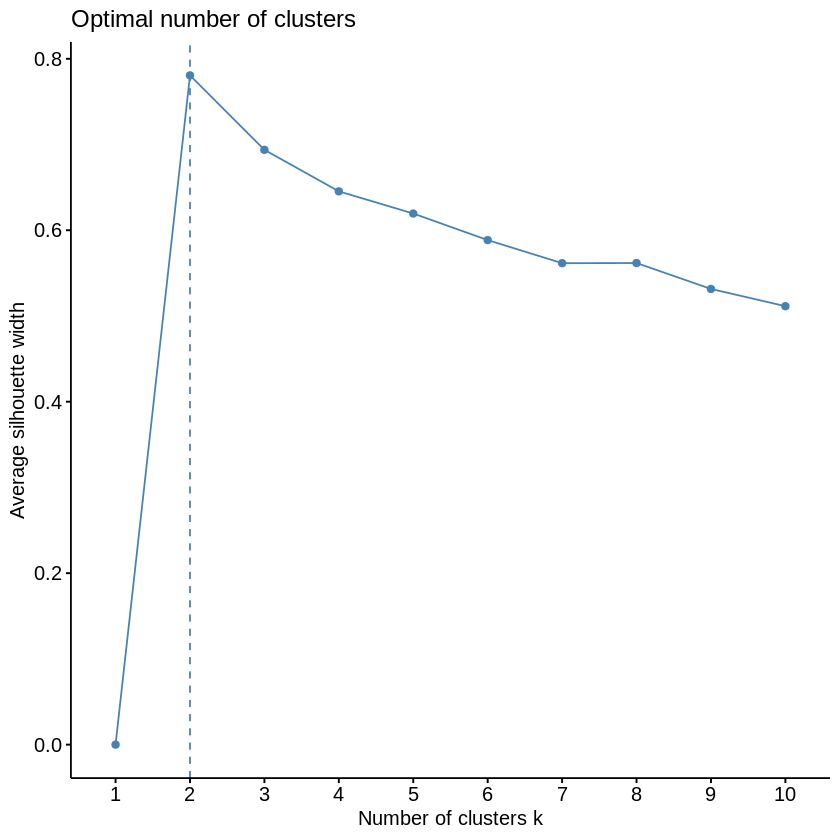

In [108]:
# getting the optimum number of clusters to use

fviz_nbclust(newdf, kmeans, method='silhouette')

# Hierarchical Clustering

In [114]:
#computing the Euclidean distance between observations

d = dist(newdf, method = 'euclidean')

summary(d)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.1   349.7   845.9  1533.2  1849.9 64117.1 

In [115]:
str(d)

 'dist' num [1:74548155] 64.03 8.94 4.81 627.58 155.28 ...
 - attr(*, "Size")= int 12211
 - attr(*, "Labels")= chr [1:12211] "1" "2" "3" "4" ...
 - attr(*, "Diag")= logi FALSE
 - attr(*, "Upper")= logi FALSE
 - attr(*, "method")= chr "euclidean"
 - attr(*, "call")= language dist(x = newdf, method = "euclidean")


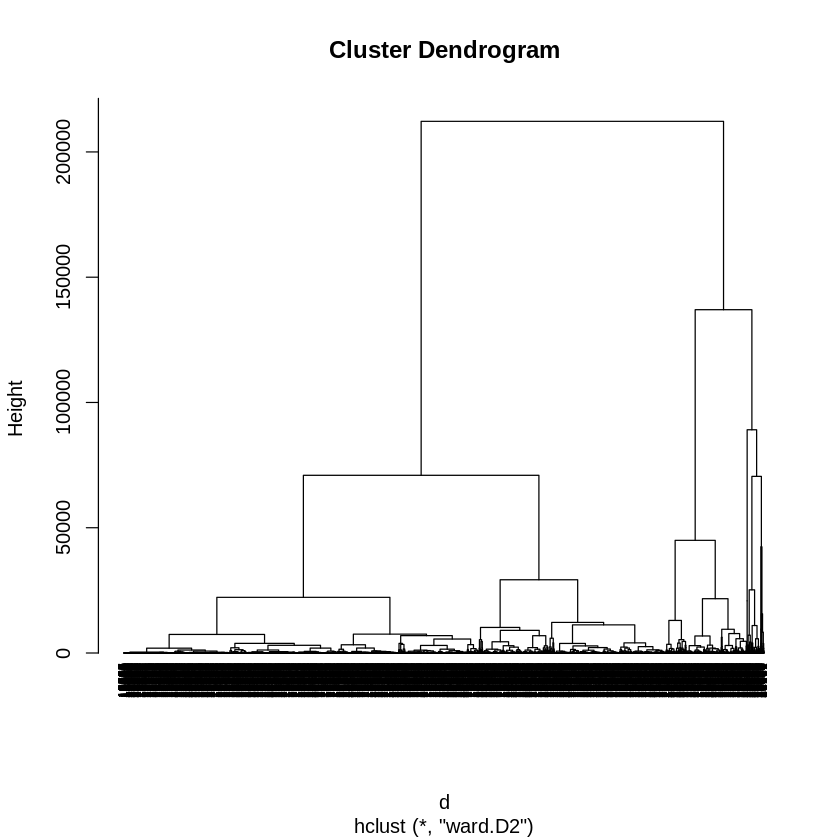

In [109]:
hie = hclust(d, 'ward.D2')
plot(hie,hang = -1, cex = 0.6)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


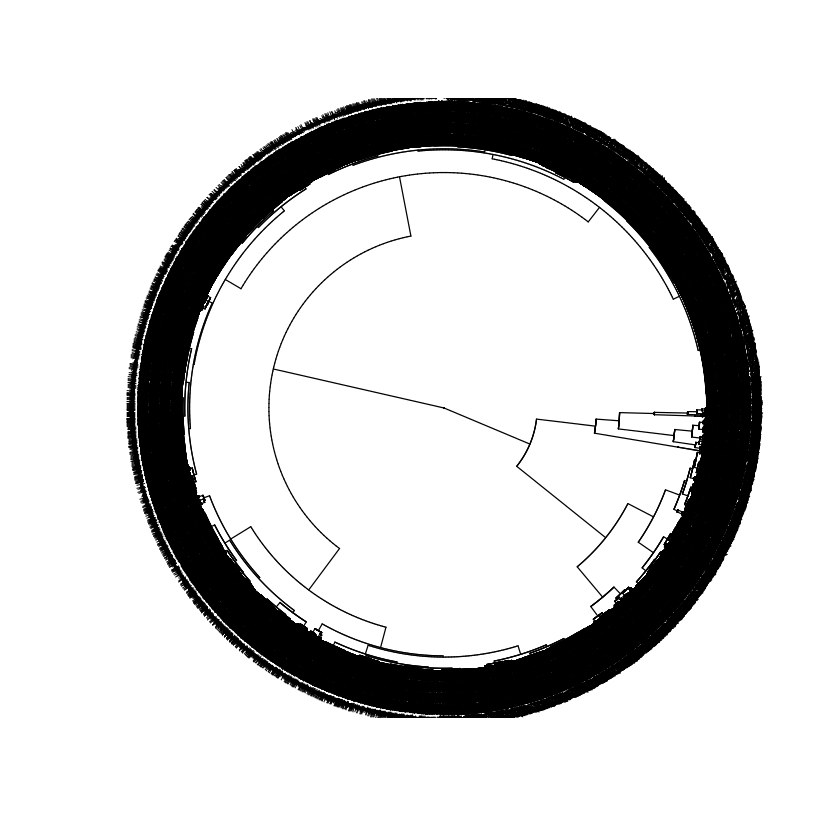

In [113]:
install.packages('ape')

library(ape)

plot(as.phylo(hie), type = "fan")

# Challenge the Solution


# Follow up Questions